In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [9]:
url = '../southKorea_geo.json'
kmap = gpd.read_file(url)
kmap.head()

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((954491.1723041544 1959777.224306107,..."
1,26,Busan,부산광역시,(POLYGON ((1121112.951227061 1678008.671629882...
2,27,Daegu,대구광역시,"POLYGON ((1107777.593331498 1780522.268515401,..."
3,28,Incheon,인천광역시,(POLYGON ((920039.0792014697 1941783.914120977...
4,29,Gwangju,광주광역시,"POLYGON ((932712.6874476601 1696168.691795945,..."


In [32]:
kmap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
CTPRVN_CD     17 non-null object
CTP_ENG_NM    17 non-null object
CTP_KOR_NM    17 non-null object
geometry      17 non-null object
dtypes: object(4)
memory usage: 624.0+ bytes


DataStructure 
- GeoSeries, GeoDataFrame
- Attributes, Methods


#### Attributes http://geopandas.org/data_structures.html

In [20]:
# kmap.loc[0].bounds
kmap.area.head()

0    6.104046e+08
1    7.589304e+08
2    8.731656e+08
3    9.924496e+08
4    4.944401e+08
dtype: float64

In [21]:
kmap.bounds.head()

,minx,miny,maxx,maxy
0,9.356657e+05,1.936736e+06,9.718437e+05,1.966987e+06
1,1.117826e+06,1.669850e+06,1.162542e+06,1.711593e+06
2,1.077566e+06,1.734887e+06,1.113737e+06,1.780522e+06
3,7.461103e+05,1.913424e+06,9.376360e+05,2.001668e+06
4,9.227001e+05,1.673257e+06,9.564204e+05,1.696169e+06


In [22]:
kmap.total_bounds

array([ 746110.25721421, 1467877.23146935, 1301857.06832953,
       2066199.88136328])

In [24]:
kmap.geom_type.head()

0         Polygon
1    MultiPolygon
2         Polygon
3    MultiPolygon
4         Polygon
dtype: object

In [26]:
kmap.is_valid.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

#### Basic Methods

In [33]:
# kmap.loc[0].distance(kmap.loc[1])
# 'Series' object has no attribute 'distance'

In [28]:
kmap.centroid.head()

0    POINT (955285.1797658597 1950483.230136003)
1    POINT (1142122.622228307 1690754.501702299)
2    POINT (1096309.718334452 1759805.885727252)
3    POINT (902851.8551085691 1956100.815166697)
4    POINT (939345.9142179661 1684743.438257294)
dtype: object

In [36]:
kmap.representative_point().head()

0    POINT (950789.8697060299 1952171.542299271)
1      POINT (1144872.330456862 1693272.3866539)
2    POINT (1098840.512448901 1758475.592124166)
3    POINT (909133.3188247897 1942962.147013715)
4    POINT (939376.4749288084 1684016.986557842)
dtype: object

In [38]:
# kmap.to_crs()

#### can rename the geomtry, but also need to reset it as GeoDataframe tracks active 'geometry 'column

In [39]:
kmap.geometry.name

'geometry'

#### Mapping

In [42]:
kmap['Top_Population'] = pd.DataFrame({'POP_TOP': [1,1,1,1,1 ,1,0,0,2,0, 0,0,0,0,0, 0,0]}) 

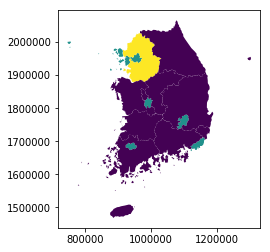

In [44]:
kmap.plot(column='Top_Population', cmap='viridis')

#### Seoul

In [45]:
url_1 = '../seoul_geo.json'
smap = gpd.read_file(url_1)
smap.head()

,adm_nm,adm_cd,adm_cd2,geometry
0,서울특별시 종로구 사직동,1101053,1111053000,(POLYGON ((126.9768888427482 37.57565077944879...
1,서울특별시 종로구 삼청동,1101054,1111054000,"(POLYGON ((126.982689386493 37.5950655194224, ..."
2,서울특별시 종로구 부암동,1101055,1111055000,(POLYGON ((126.9758511377569 37.59656422224408...
3,서울특별시 종로구 평창동,1101056,1111056000,(POLYGON ((126.9750746678809 37.63138628651299...
4,서울특별시 종로구 무악동,1101057,1111057000,"(POLYGON ((126.960673532739 37.58079784202972,..."


#### Maps with Layers 

#### Method 1

In [47]:
smap = smap.to_crs(kmap.crs)

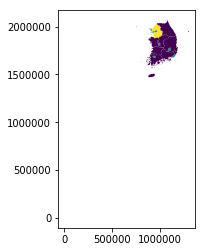

In [48]:
base = kmap.plot(column='Top_Population', cmap='viridis')
smap.plot(ax=base)

#### Method 2

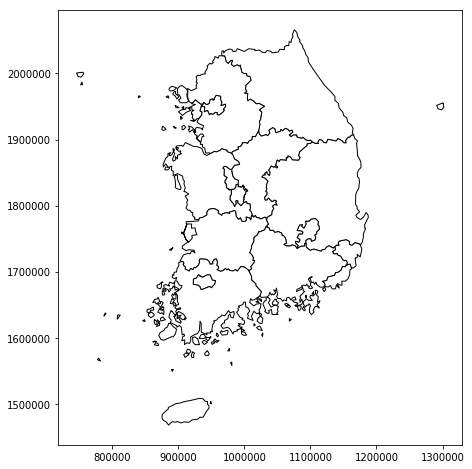

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
kmap.plot(ax=ax, color='white', edgecolor='black')
# smap.plot(ax=ax, color='red')
plt.show()

#### excercise

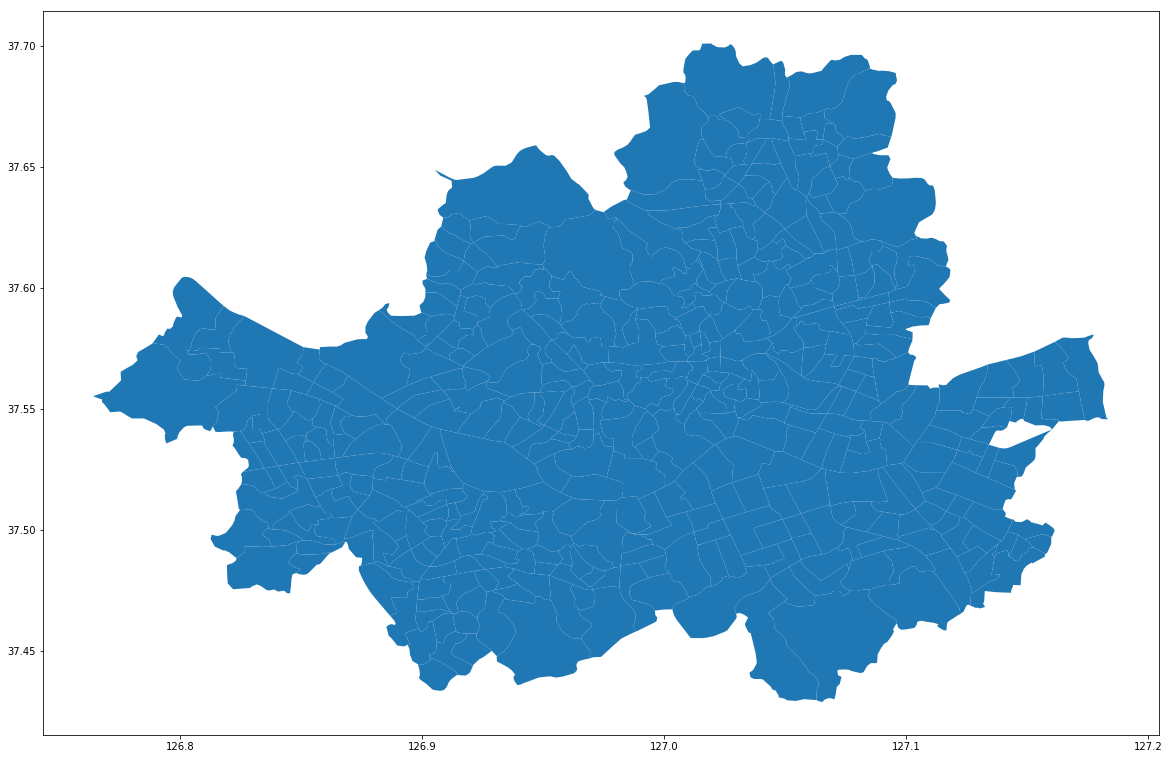

In [71]:
fig, ax = plt.subplots(figsize=(20, 20))
kmap.plot(ax=ax, column='Top_Population', cmap='viridis')
smap.plot(ax=ax)

#### CRS

In [53]:
kmap.crs

{'init': 'epsg:4326'}

In [ ]:
a